https://github.com/natisaver/GoodReads-Multilabel-Genre-Prediction

# **Genre Predictor**


**What is Genre?**

Genre is a categorisation, which can include music, art and books in our case, classified based on its contents 


**Why is Genre important?**

Genres help readers to anticipate what they are likely to find in a book and how they can use the information in it. 

**What is our project's rationale?**

Genres are often overlap and can vary complexly. Many books' genres thus often end up to be a combination of different genres. Writers often also define their own genres, leading to even more overlaps and unncessary complication. As a result, there are a plethora of genres which makes it confusing for readers to compare between books.


**What is our project's aim?**

Our project aims to create this standardisation of genres between all books, to help readers navigate across websites and stores easily to find the books they want to read.
By investigating the genres of the books in the dataset provided by Zenodo we create a multilabel genre classification model, which then predicts the genres of the book based on our standard.


*Our dataset is from: https://zenodo.org/record/4265096/files/books_1.Best_Books_Ever.csv?download=1*


#**Importing Important Libraries**

In [ ]:
import csv
import math
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sb
import os
import os.path



from ast import literal_eval
from collections import Iterable 
from imageio import imread
from io import BytesIO
from math import sqrt
import requests
from scipy.cluster.vq import whiten
from PIL import Image
from wordcloud import WordCloud

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import unicodedata
import re

nltk.download('wordnet')
nltk.download('stopwords')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=26b903cf131731313fb45ce470dec45a1231fd8f1f3cf0f71a95a615ec3815a1
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget 

# **Importing Dataset**

In [ ]:
# Downloading Dataset from the Web
book_data = wget.download("https://zenodo.org/record/4265096/files/books_1.Best_Books_Ever.csv?download=1")
print(book_data)

books_1.Best_Books_Ever.csv


In [ ]:
# Create pandas dataframe
df = pd.read_csv(book_data)

# Show dataframe
df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

# **Cleaning Dataset** 


Before we begin cleaning our dataset, let's analyse the dataframe and see the types of columns we are provided with:

In [ ]:
# Display all columns in the dataset and the count of non-null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [ ]:
# Checking for NaN values in the dataframe
df.isna().sum()

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

##**Removing Non-English Languages** 
Before we choose which columns to drop, let drop the rows with non-english books to ensure that our description of books are purely english!

In [ ]:
# Removing all non-english books from the data set 
df = df[df.language == 'English']
df.shape

(42661, 25)

##**Removing columns with large NULL and columns that are unrelated to genre prediction**
We first drop the columns with large amount of NULL values since they will not be useful in helping us predict the genres.

We also drop columns like "character", "isbn" that cannot be used to predict genres.

In [ ]:
#Removing columns with large NULL values
df.drop(['series', 'author', 'language', 'isbn', 'characters', 'bookFormat', 'edition', 'publisher', 'publishDate', 'firstPublishDate', 'awards', 'ratingsByStars', 'likedPercent', 'setting', 'bbeScore', 'bbeVotes', 'price'], axis=1, inplace=True)


In [ ]:
df.shape

(42661, 8)

##**Removing NULL Description Rows**

We also must drop those rows with no description data provided!

In [ ]:
# No Description
df['description'].isna().sum()

510

In [ ]:
#convert empty strings to NaN and drop
df.dropna(subset=['description'], inplace=True)

In [ ]:
df

,bookId,title,rating,description,genres,pages,numRatings,coverImg
0,2767052-the-hunger-games,The Hunger Games,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,6376780,https://i.gr-assets.com/images/S/compressed.ph...
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,2507623,https://i.gr-assets.com/images/S/compressed.ph...
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",324,4501075,https://i.gr-assets.com/images/S/compressed.ph...
3,1885.Pride_and_Prejudice,Pride and Prejudice,4.26,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical...",279,2998241,https://i.gr-assets.com/images/S/compressed.ph...
4,41865.Twilight,Twilight,3.60,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,4964519,https://i.gr-assets.com/images/S/compressed.ph...
...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,4.00,The Fateful Trilogy continues with Fractured. ...,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",0,871,https://i.gr-assets.com/images/S/compressed.ph...
52474,11836711-anasazi,Anasazi,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...","['Mystery', 'Young Adult']",190,37,https://i.gr-assets.com/images/S/compressed.ph...
52475,10815662-marked,Marked,3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",280,6674,https://i.gr-assets.com/images/S/compressed.ph...
52476,11330278-wayward-son,Wayward Son,3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,"['Fiction', 'Mystery', 'Historical Fiction', '...",507,238,https://i.gr-assets.com/images/S/compressed.ph...


After we have narrowed down the columns that we want to focus on, we can start to clean the informations in those columns.

## **Cleaning Genre**

Let's find out the number of total genres in the entire dataframe:

Here, we manually stripped the string and split it by the commas.



In [ ]:
# Create an array to store all genres
all_genres = []

for row in df['genres']:
    # Clean up genre name before adding to master list
    i = row.strip('[]').replace("'",'').split(', ')
    for j in i:
        all_genres.append(j)
        
all_genres = list(set(all_genres))

In [ ]:
# Checking the total number of unique genre in the data set
len(all_genres)

967

**967** genres is a lot of genres! Let's find out what are the genres in the dataset

In [ ]:
# Sorting all the 967 genres in alphabetical order
all_genres.sort()
all_genres = [g.lower() for g in all_genres]
print(all_genres)

['', '10th century', '11th century', '12th century', '13th century', '14th century', '15th century', '16th century', '17th century', '18th century', '19th century', '1st grade', '20th century', '21st century', '2nd grade', '40k', 'abuse', 'academia', 'academic', 'academics', 'action', 'activism', 'adoption', 'adult', 'adult fiction', 'adventure', 'aeroplanes', 'africa', 'african american', 'african american literature', 'african american romance', 'african literature', 'agriculture', 'aircraft', 'airships', 'albanian literature', 'alchemy', 'alcohol', 'algebra', 'algeria', 'algorithms', 'aliens', 'alternate history', 'alternate universe', 'alternative medicine', 'amateur sleuth', 'amazon', 'american', 'american civil war', 'american classics', 'american fiction', 'american history', 'american revolution', 'american revolutionary war', 'americana', 'amish', 'amish fiction', 'anarchism', 'ancient', 'ancient history', 'angels', 'anglo saxon', 'animal fiction', 'animals', 'anime', 'antholo

We notice that the genres in the data set consists of tags in addition to the actual genres. We will be removing the unnecessary tags and focusing on the actual genres of the book.

In [ ]:
# Changing the column of genres into array in order to see which genre is the most common
df['genres'] = df['genres'].apply(literal_eval)

In [ ]:
# Checking the data type of the column now
type(df.iloc[0]['genres'])

list

In [ ]:
# Make all the genres to lower casing to standardize and make the dataset easier to read
df['genres'] = df['genres'].apply(lambda x: [w.lower() for w in x])

In [ ]:
df

,bookId,title,rating,description,genres,pages,numRatings,coverImg
0,2767052-the-hunger-games,The Hunger Games,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young adult, fiction, dystopia, fantasy, scie...",374,6376780,https://i.gr-assets.com/images/S/compressed.ph...
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,There is a door at the end of a silent corrido...,"[fantasy, young adult, fiction, magic, childre...",870,2507623,https://i.gr-assets.com/images/S/compressed.ph...
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,The unforgettable novel of a childhood in a sl...,"[classics, fiction, historical fiction, school...",324,4501075,https://i.gr-assets.com/images/S/compressed.ph...
3,1885.Pride_and_Prejudice,Pride and Prejudice,4.26,Alternate cover edition of ISBN 9780679783268S...,"[classics, fiction, romance, historical fictio...",279,2998241,https://i.gr-assets.com/images/S/compressed.ph...
4,41865.Twilight,Twilight,3.60,About three things I was absolutely positive.\...,"[young adult, fantasy, romance, vampires, fict...",501,4964519,https://i.gr-assets.com/images/S/compressed.ph...
...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,4.00,The Fateful Trilogy continues with Fractured. ...,"[vampires, paranormal, young adult, romance, f...",0,871,https://i.gr-assets.com/images/S/compressed.ph...
52474,11836711-anasazi,Anasazi,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...","[mystery, young adult]",190,37,https://i.gr-assets.com/images/S/compressed.ph...
52475,10815662-marked,Marked,3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,"[fantasy, young adult, paranormal, angels, rom...",280,6674,https://i.gr-assets.com/images/S/compressed.ph...
52476,11330278-wayward-son,Wayward Son,3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,"[fiction, mystery, historical fiction, adventu...",507,238,https://i.gr-assets.com/images/S/compressed.ph...


In [ ]:
# Count the frequency of each genre
genreCount = pd.Series([x for item in df.genres for x in item]).value_counts()
# Listing the count of each genre
genreCount.head(60)

fiction                    27005
romance                    13593
fantasy                    13448
young adult                10537
contemporary                9064
adult                       7549
mystery                     6963
nonfiction                  6742
historical fiction          6610
audiobook                   6550
adventure                   5825
novels                      5788
paranormal                  5638
historical                  5585
classics                    5445
science fiction             4890
childrens                   4492
literature                  4245
thriller                    4057
magic                       3958
humor                       3650
contemporary romance        3304
crime                       3292
urban fantasy               3261
suspense                    3202
science fiction fantasy     3092
middle grade                3057
chick lit                   3036
supernatural                3035
history                     2980
mystery th

From looking at the top 60 genres we see that some tags overlap and are subsidiaries of specific genres.

We will combine any of these overlaps as they are signifcantly large in quantity and standardise to top 30.

1. History & Historical => History
2. Science Fiction Fantasy => Science Fiction, Fantasy
3. Mystery Thriller => Mystery, Thriller
4. Paranormal Romance => Paranormal, Romance
5. Supernatural => Paranormal
6. Adult Fiction => Adult, Fiction
7. British Literature => Literature
8. Realistic Fiction, Literary Fiction => Fiction
9. Urban Fantasy => Fantasy
10. New Adult => Young Adult, Fiction
11. Memoir => Biography
12. Erotica => Romance
13. Drama => Novels
14. Vampires => Fantasy
15. War => Nonfiction, History
16. Religion / Christian => History
17.American / Politics / Psychology => Nonfiction
18. Graphic Novels / Comics => Novels
19. Family => Adult
20. Juvenile => Teen
21. High Fantasy / Dystopia => Fantasy
22. All centuries => History

The Rest are to be dropped.

Let's then keep these standardised top 30 genres

In [ ]:
import pandas as pd

dictc = {'new adult':['young adult', 'fiction'],'adult fiction':['adult', 'fiction'],'paranormal romance':['paranormal', 'romance'],'mystery thriller':['mystery', 'thriller'],'science fiction fantasy':['science fiction', 'fantasy'], 'historical':'history', 'supernatural':'paranormal', 'british literature': 'literature', 'realistic fiction':'fiction', 'literary fiction':'fiction', 'urban fantasy':'fantasy', 'memoir': 'biography', 'erotica': 'romance', 'drama':'novels', 'vampires':'fantasy', 'war':['nonfiction','history'], 'american': 'nonfiction', 'religion': 'history', 'christian': 'history', 'biography memoir':['biography','memoir'] ,'politics':'nonfiction', 'psychology':'nonfiction', 'graphic novels':'novels', 'comics':'novels','family':'adult', 'juvenile':'teen', 'high fantasy':'fantasy', 'dystopia':'fantasy', '10th century':'history', '11th century':'history', '12th century':'history', '13th century':'history', '14th century':'history', '15th century':'history', '16th century':'history', '17th century':'history', '18th century':'history', '19th century':'history', '20th century':'history', '21st century':'history'}

# function for the flattening of any arrays
from collections import Iterable
def flatten(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                 yield x
         else:        
             yield item

# (1) applying dictionary
# (2) Flatten if any nested lists into one dimensional matrix
# (3) Set to remove repeated elements
for i, row in df.iterrows():
  newlist = []
  for j in row['genres']:

    if j in dictc:
      newlist.append(dictc[j])
    else:
      newlist.append(j)
  df.at[i,'genres'] = list(set(flatten(newlist)))

# View Resultant dataframe
genreCount = pd.Series([x for item in df.genres for x in item]).value_counts()

# Listing the count of each genre
genreCount.head(30)

fiction                 28203
fantasy                 14054
romance                 13765
history                 11942
young adult             11677
nonfiction               9536
adult                    9376
contemporary             9064
novels                   8663
mystery                  7027
historical fiction       6610
audiobook                6550
science fiction          6040
paranormal               5915
literature               5860
adventure                5825
classics                 5445
thriller                 4637
childrens                4492
teen                     4092
magic                    3958
humor                    3650
contemporary romance     3304
crime                    3292
suspense                 3202
middle grade             3057
chick lit                3036
biography                2968
horror                   2596
philosophy               2111
dtype: int64

The next step is to clean out the rest of the unrelated tags outside of these top 30 genres.

In [ ]:
top30genrelist = ['fiction',
'fantasy',
'romance',
'young adult',
'contemporary',
'adult',
'nonfiction',
'history',
'novels',
'mystery',
'historical fiction',
'audiobook',
'science fiction',
'paranormal',
'literature',
'adventure',
'classics',
'thriller',
'childrens',
'magic',
'humor',
'contemporary romance',
'crime',
'suspense',
'middle grade',
'chick lit',
'biography',
'teen',
'horror',
'philosophy']

for i, row in df.iterrows():
  newlist = []
  for j in row['genres']:

    if j in top30genrelist:
      newlist.append(j)
    else:
      pass

  df.at[i,'genres'] = newlist

df.isna().sum()

df2 = df[df["genres"].str.len() != 0]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39063 entries, 0 to 52477
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bookId       39063 non-null  object 
 1   title        39063 non-null  object 
 2   rating       39063 non-null  float64
 3   description  39063 non-null  object 
 4   genres       39063 non-null  object 
 5   pages        38182 non-null  object 
 6   numRatings   39063 non-null  int64  
 7   coverImg     38965 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.7+ MB


**Great We Now have 30 genres**

> Fiction                 
Fantasy                 
Romance                 
Young Adult             
Contemporary             
Adult                    
Nonfiction               
History                  
Novels                   
Mystery                  
Historical Fiction       
Audiobook                
Science Fiction          
Paranormal               
Literature               
Adventure                
Classics                 
Thriller                 
Childrens                
Magic                    
Humor                    
Contemporary Romance     
Crime                    
Suspense                 
Middle Grade             
Chick Lit                
Biography                
Teen                     
Horror                   
Philosophy             

In [ ]:
df = df2

##**Cleaning Description**
Now, let's clean the description column.


Let's look at a random book description so that we know what to clean out.

> "Written in his distinctively dazzling manner, Oscar Wildeâ€™s story of a fashionable young man who sells his soul for eternal youth and beauty is the authorâ€™s most popular work. The tale of Dorian Grayâ€™s moral disintegration caused a scandal when it ï¬rst appeared in 1890, but though Wilde was attacked for the novelâ€™s corrupting inï¬‚uence, he responded that there is, in fact, â€œa terrible moral in Dorian Gray.â€ Just a few years later, the book and the aesthetic/moral dilemma it presented became issues in the trials occasioned by Wildeâ€™s homosexual liaisons, which resulted in his imprisonment. Of Dorian Grayâ€™s relationship to autobiography, Wilde noted in a letter, â€œBasil Hallward is what I think I am: Lord Henry what the world thinks me: Dorian what I would like to beâ€”in other ages, perhaps."



We want to:


* Remove any punctuations  
* Remove accented characters
* Keeping only alphabetic strings
* Lower casing all the words 
* Group together inflected or variant forms of the same word 
* Removing 'english' stop words

Using the **Natural Language Toolkit libraries**

**Remove Punctuations**

E.g. **:** , **-** , **"** , **.** 

In [ ]:
# Function to remove the punctuations
def removePunctuation(sentence):
  cleanSentence = re.sub(r'[?|!|\'|"|#]', '', sentence)
  cleanSentence = re.sub(r'[,|.|;|:|(|)|{|}|\|/|<|>]|-', ' ', cleanSentence)
  cleanSentence = cleanSentence.replace("\n", " ")
  return cleanSentence

**Removing Accented Characters** 

Accent marks are diacritic marks, which are added to a letter or character to set them apart from others and “give it a particular phonetic value, to indicate stress, etc. They do not affect the genre of the books, therefore we can remove them.

E.g. ā, ē, ī, ū, č, ģ, ķ, ļ, ņ, š, ž

In [ ]:
# Function to remove accented characters 
def accentedChar(sentence):
  cleanSentence = unicodedata.normalize('NFD', sentence)
  cleanSentence = cleanSentence.encode('ascii', 'ignore')
  cleanSentence = cleanSentence.decode("utf-8")
  return cleanSentence 

**Keeping only alphabetic strings**

Keeping only strings consisting solely of letters from the same alphabet. Words that are not from ASCII will be removed!


In [ ]:
# Function to remove non-ASCII strings.
def alphaStrings(sentence):
  cleanSentence = re.sub('[^a-z A-Z]+', ' ', sentence)
  return cleanSentence

**Lowering casing the description words**

Words that are in the upper case wil be converted to lower casing.

In [ ]:
# Function to lower case the words 
def lowerCase(sentence):
  cleanSentence = sentence.lower()
  return cleanSentence

**Lemmatizing** 
Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . 

E.g. change, changing, changes, changed, changer => change

In [ ]:
# Function to lemmatize the words 
def lemmatizing(sentence):
  lemma = WordNetLemmatizer()
  cleanWords = [lemma.lemmatize(word, 'v') for word in sentence.split()]
  cleanSentence = ' '.join(cleanWords)
  return cleanSentence


**Removing english stop words**

Stopwords are the words in any language which does not add much meaning to the sentence. They can be ignored without sacrificing the meaning of the sentence. 

E.g. a, with, from, to, the 


In [ ]:
def removeStop(sentence):
    stop_words = set(stopwords.words('english'))
    stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten',
                       'may','also','across','among','beside','however','yet','within'])
    no_stop_words=[word for word in sentence.split() if word not in stop_words]
    no_step_sentence = ' '.join(no_stop_words)
    return no_step_sentence

**Combining the Sub-Functions to on main function to clean the description**

In [ ]:
def desCleaner(sentence):
  cleanSentence = removePunctuation(sentence)
  cleanSentence = accentedChar(cleanSentence)
  cleanSentence = alphaStrings(cleanSentence)
  cleanSentence = lowerCase(cleanSentence)
  cleanSentence = lemmatizing(cleanSentence)
  cleanSentence = removeStop(cleanSentence)
  return cleanSentence

**Applying it to our dataset!**

In [ ]:
# Applying the entire function to clean the description onto our dataset
df['description'] = df['description'].apply(desCleaner)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We Now have cleaned the description as seen below!

In [ ]:
df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,win mean fame fortune lose mean certain death ...,English,9780439023481,"[young adult, fiction, science fiction, fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,door end silent corridor haunt harry pottters ...,English,9780439358071,"[young adult, childrens, middle grade, audiobo...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,unforgettable novel childhood sleepy southern ...,English,9999999999999,"[young adult, literature, history, classics, h...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,
3,1885.Pride_and_Prejudice,Pride and Prejudice,,"Jane Austen, Anna Quindlen (Introduction)",4.26,alternate cover edition isbn since immediate s...,English,9999999999999,"[literature, history, classics, historical fic...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,things absolutely positive first edward vampir...,English,9780316015844,"[young adult, fiction, teen, fantasy, paranorm...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,fateful trilogy continue fracture call fractur...,English,2940012616562,"[young adult, fiction, fantasy, magic, paranor...",[],...,,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,anasazi sequel thirteenth chime emma michaels ...,English,9999999999999,"[young adult, mystery]",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,readers favorite award winner sixteen year old...,English,9781461017097,"[young adult, fiction, fantasy, paranormal, ro...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,powerful tremor unearth ancient secretburied n...,English,9781450755634,"[history, mystery, histo

## **Multi-Hot Binary Encoding of Genre** 

Encoding each genre into a binary representation:

The class labels (i.e the genres) are categorical in nature and have to be converted into numerical form before classification is performed. One-hot encoding is adopted, which converts categorical labels into a vector of binary values. 

**Each of the 30 genres are represented as a one-hot encoded column.** 

**If a book belongs to a genre, the value is 1 ("hot"), otherwise its 0.** 

**Each book can belong to multiple genres, and would constitute the case of multiple-hot encoding (as multiple genre values can be "hot").**


In [ ]:
# Go through all rows to check if book has each genre
# Change boolean value to 1 (0 = False) if the book contains genre
for i in df.index:
    for genre in top30genrelist:
        # Assign the value 1 if the genre exists
        df.loc[ df.index == i, genre ] = bool(genre in df['genres'][i])
    if i % 100 == 0:
        print(i, end='\r')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


**Error can be ignored, DF does get encoded with binary representation! :)**

##**Extracting Image Features (Relative Brightness of Cover Image)**
**This entire process takes about 9 hours, as a result we have exported the dataset as a csv file, refer to the section `⭐ Reimport TBG Data Set` to skip rerunning this portion**

* Multiple different libraries were utilised to try to extract RGB features, such as matplotlib and the whiten function in scipy.cluster. However, we found that the pillows library worked best without any errors. 

* Multiple exception clauses were added to ensure errors due to corrupt image and array data could be avoided as the processing time is significantly large.

* The pillows function decodes pixel data only and not entire images. We thus wrapped the image data into a BytesIO object, and use open() to load it.

* The `convert()` function then returns a converted copy of this image through the palette.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imageio import imread
from scipy.cluster.vq import whiten
import math

from PIL import Image
from math import sqrt
import requests
from io import BytesIO

for j, row in df.iterrows():
  try:
    url = row['coverImg']
    response = requests.get(url)
    imag = Image.open(BytesIO(response.content))
    #Convert the image te RGB if it is a .gif for example
    imag = imag.convert ('RGB')
    #coordinates of the pixel
    X,Y = 0,0
    #Get RGB
    pixelRGB = imag.getpixel((X,Y))
    R,G,B = pixelRGB 
    df.at[j,'r'] = R
    df.at[j,'g'] = G
    df.at[j,'b'] = B 
  except (IOError,ValueError,IndexError, AttributeError, TypeError) as e:
    pass

df.head(3)

,bookId,title,rating,description,genres,pages,numRatings,coverImg,fiction,fantasy,...,suspense,middle grade,chick lit,biography,teen,horror,philosophy,r,g,b
0,2767052-the-hunger-games,The Hunger Games,4.33,win mean fame fortune lose mean certain death ...,"['young adult', 'fiction', 'science fiction', ...",374,6376780,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,False,False,False,False,True,False,False,0.0,0.0,0.0
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,door end silent corridor haunt harry pottters ...,"['young adult', 'childrens', 'middle grade', '...",870,2507623,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,False,True,False,False,False,False,False,6.0,52.0,85.0
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,unforgettable novel childhood sleepy southern ...,"['young adult', 'literature', 'history', 'clas...",324,4501075,https://i.gr-assets.com/images/S/compressed.ph...,True,False,...,False,False,False,False,False,False,False,168.0,187.0,142.0


Luminance (Relative Brightness)
*  We then calculate the `luminance`, to emphasize the physiological aspects: 
> The human eyeball is **most sensitive to green light**, less to red and least to blue.

*  `Luminance` is used as it helps characterize emission from flat, diffuse surfaces, which make sense in the context of book covers. Specifically,  `Luminance` levels indicate how much luminous power could be detected by the human eye looking at a particular surface from a particular angle of view. 
> Luminance is thus an indicator of **how bright the surface will appear**.



In [ ]:
#Relative Brightness
for j, row in df.iterrows():
    df.at[j,'brightness'] = math.sqrt(0.241*(row.r**2) + 0.691*(row.g**2) + 0.068*(row.b**2))

df.head()

,bookId,title,rating,description,genres,pages,numRatings,coverImg,fiction,fantasy,...,middle grade,chick lit,biography,teen,horror,philosophy,r,g,b,brightness
0,2767052-the-hunger-games,The Hunger Games,4.33,win mean fame fortune lose mean certain death ...,"['young adult', 'fiction', 'science fiction', ...",374,6376780,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,False,False,False,True,False,False,0.0,0.0,0.0,0.000000
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,door end silent corridor haunt harry pottters ...,"['young adult', 'childrens', 'middle grade', '...",870,2507623,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,True,False,False,False,False,False,6.0,52.0,85.0,48.666621
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,unforgettable novel childhood sleepy southern ...,"['young adult', 'literature', 'history', 'clas...",324,4501075,https://i.gr-assets.com/images/S/compressed.ph...,True,False,...,False,False,False,False,False,False,168.0,187.0,142.0,179.824122
3,1885.Pride_and_Prejudice,Pride and Prejudice,4.26,alternate cover edition isbn since immediate s...,"['literature', 'history', 'classics', 'histori...",279,2998241,https://i.gr-assets.com/images/S/compressed.ph...,True,False,...,False,False,False,False,False,False,91.0,90.0,96.0,90.661508
4,41865.Twilight,Twilight,3.60,things absolutely positive first edward vampir...,"['young adult', 'fiction', 'teen', 'fantasy', ...",501,4964519,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,False,False,False,True,False,False,236.0,233.0,224.0,233.127439


We download the file so that we don't have to repeatedly run the same code for a long time.

The file will be stored in the same drive as the ipynb.

In [ ]:
from google.colab import files
df.to_csv('dfRGB.csv') 
files.download('dfRGB.csv')

## * **⭐Import dataset with RBG values**

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1OPeIuCLAfUOjxPQCaMZmF4GNFNBAczYO/view?usp=sharing'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('rgboutput.csv') 
 
df = pd.read_csv('rgboutput.csv', index_col=[0])

df

,bookId,title,rating,description,genres,pages,numRatings,coverImg,fiction,fantasy,...,middle grade,chick lit,biography,teen,horror,philosophy,r,g,b,brightness
0,2767052-the-hunger-games,The Hunger Games,4.33,win mean fame fortune lose mean certain death ...,"['young adult', 'fiction', 'science fiction', ...",374,6376780,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,False,False,False,True,False,False,0.0,0.0,0.0,0.000000
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,door end silent corridor haunt harry pottters ...,"['young adult', 'childrens', 'middle grade', '...",870,2507623,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,True,False,False,False,False,False,6.0,52.0,85.0,48.666621
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,unforgettable novel childhood sleepy southern ...,"['young adult', 'literature', 'history', 'clas...",324,4501075,https://i.gr-assets.com/images/S/compressed.ph...,True,False,...,False,False,False,False,False,False,168.0,187.0,142.0,179.824122
3,1885.Pride_and_Prejudice,Pride and Prejudice,4.26,alternate cover edition isbn since immediate s...,"['literature', 'history', 'classics', 'histori...",279,2998241,https://i.gr-assets.com/images/S/compressed.ph...,True,False,...,False,False,False,False,False,False,91.0,90.0,96.0,90.661508
4,41865.Twilight,Twilight,3.60,things absolutely positive first edward vampir...,"['young adult', 'fiction', 'teen', 'fantasy', ...",501,4964519,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,False,False,False,True,False,False,236.0,233.0,224.0,233.127439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,4.00,fateful trilogy continue fracture call fractur...,"['young adult', 'fiction', 'fantasy', 'magic',...",0,871,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,False,False,False,False,False,False,14.0,9.0,5.0,10.242412
52474,11836711-anasazi,Anasazi,4.19,anasazi sequel thirteenth chime emma michaels ...,"['young adult', 'mystery']",190,37,https://i.gr-assets.com/images/S/compressed.ph...,False,False,...,False,False,False,False,False,False,0.0,0.0,8.0,2.086145
52475,10815662-marked,Marked,3.70,readers favorite award winner sixteen year old...,"['young adult', 'fiction', 'fantasy', 'paranor...",280,6674,https://i.gr-assets.com/images/S/compressed.ph...,True,True,...,False,False,False,False,False,False,11.0,9.0,10.0,9.588118
52476,11330278-wayward-son,Wayward Son,3.85,powerful tremor unearth ancient secretburied n...,"['history', 'mystery', 'historical fiction', '...",507,238,https://i.gr-assets.com/images/S/compressed.ph...,True,False,...,False,False,False,False,False,False,38.0,22.0,0.0,26.123706


## **Convert Boolean to Int**
We convert our boolean variable to 0 or 1 so that we can use our model to predict.



In [ ]:
# Iterating through the dataframe and converting all the true/false values to 1's and 0's
for idx, col in enumerate(top30genrelist):
  df[col] = df[col].astype(int)

df

,bookId,title,rating,description,genres,pages,numRatings,coverImg,fiction,fantasy,...,middle grade,chick lit,biography,teen,horror,philosophy,r,g,b,brightness
0,2767052-the-hunger-games,The Hunger Games,4.33,win mean fame fortune lose mean certain death ...,"['adventure', 'fiction', 'teen', 'young adult'...",374,6376780,https://i.gr-assets.com/images/S/compressed.ph...,1,1,...,0,0,0,1,0,0,0.0,0.0,0.0,0.000000
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,door end silent corridor haunt harry pottters ...,"['adventure', 'childrens', 'fiction', 'magic',...",870,2507623,https://i.gr-assets.com/images/S/compressed.ph...,1,1,...,1,0,0,0,0,0,6.0,52.0,85.0,48.666621
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,unforgettable novel childhood sleepy southern ...,"['literature', 'history', 'fiction', 'historic...",324,4501075,https://i.gr-assets.com/images/S/compressed.ph...,1,0,...,0,0,0,0,0,0,168.0,187.0,142.0,179.824122
3,1885.Pride_and_Prejudice,Pride and Prejudice,4.26,alternate cover edition isbn since immediate s...,"['literature', 'history', 'fiction', 'adult', ...",279,2998241,https://i.gr-assets.com/images/S/compressed.ph...,1,0,...,0,0,0,0,0,0,91.0,90.0,96.0,90.661508
4,41865.Twilight,Twilight,3.60,things absolutely positive first edward vampir...,"['paranormal', 'fiction', 'teen', 'young adult...",501,4964519,https://i.gr-assets.com/images/S/compressed.ph...,1,1,...,0,0,0,1,0,0,236.0,233.0,224.0,233.127439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,4.00,fateful trilogy continue fracture call fractur...,"['paranormal', 'fiction', 'magic', 'young adul...",0,871,https://i.gr-assets.com/images/S/compressed.ph...,1,1,...,0,0,0,0,0,0,14.0,9.0,5.0,10.242412
52474,11836711-anasazi,Anasazi,4.19,anasazi sequel thirteenth chime emma michaels ...,"['young adult', 'mystery']",190,37,https://i.gr-assets.com/images/S/compressed.ph...,0,0,...,0,0,0,0,0,0,0.0,0.0,8.0,2.086145
52475,10815662-marked,Marked,3.70,readers favorite award winner sixteen year old...,"['paranormal', 'fiction', 'young adult', 'roma...",280,6674,https://i.gr-assets.com/images/S/compressed.ph...,1,1,...,0,0,0,0,0,0,11.0,9.0,10.0,9.588118
52476,11330278-wayward-son,Wayward Son,3.85,powerful tremor unearth ancient secretburied n...,"['adventure', 'history', 'fiction', 'suspense'...",507,238,https://i.gr-assets.com/images/S/compressed.ph...,1,0,...,0,0,0,0,0,0,38.0,22.0,0.0,26.123706


## **Convert Float to String for Description Column**

Some descriptions only contain numbers, we thus have to change the data type to strings to ensure that we do not encounter problems with different data types in the column when we vectorise it.

In [ ]:
df['description'] = df['description'].apply(str) 

## **Remove rows that are NULL for brightness** 

For some of the RGB values or for any errors in the extraction of images, the relative brightness column will be null. This could also occur in the situation where the cover image does not exist.

We shall remove these rows accordingly:

In [ ]:
df = df[df['brightness'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38961 entries, 0 to 52477
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bookId                38961 non-null  object 
 1   title                 38961 non-null  object 
 2   rating                38961 non-null  float64
 3   description           38961 non-null  object 
 4   genres                38961 non-null  object 
 5   pages                 38119 non-null  object 
 6   numRatings            38961 non-null  int64  
 7   coverImg              38961 non-null  object 
 8   fiction               38961 non-null  int64  
 9   fantasy               38961 non-null  int64  
 10  romance               38961 non-null  int64  
 11  young adult           38961 non-null  int64  
 12  contemporary          38961 non-null  int64  
 13  adult                 38961 non-null  int64  
 14  nonfiction            38961 non-null  int64  
 15  history            

In [ ]:
df = df[df.brightness != 0]
df = df[df.brightness != 255]
df = df[df.brightness.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36067 entries, 1 to 52477
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bookId                36067 non-null  object 
 1   title                 36067 non-null  object 
 2   rating                36067 non-null  float64
 3   description           36067 non-null  object 
 4   genres                36067 non-null  object 
 5   pages                 35309 non-null  object 
 6   numRatings            36067 non-null  int64  
 7   coverImg              36067 non-null  object 
 8   fiction               36067 non-null  int64  
 9   fantasy               36067 non-null  int64  
 10  romance               36067 non-null  int64  
 11  young adult           36067 non-null  int64  
 12  contemporary          36067 non-null  int64  
 13  adult                 36067 non-null  int64  
 14  nonfiction            36067 non-null  int64  
 15  history            

In [ ]:
# Clean the pages
# Convert dtype of pages
# Get rid of all the "1 Page" rows, ugly data.
df["pages"] = pd.to_numeric(df["pages"], errors='coerce')

## **Outlier Removal and Analysis for Numerical Variables**

The interquartile range formula:

`IQR = Q3 – Q1.`


The `IQR` is a measure of where the bulk of the values lie, which includes the 50% of data points that are above Q1 and below Q4. 


In [ ]:
# IQR filter: within 2.22 IQR (equiv. to z-score < 3)
df_sub = df[['pages', 'numRatings','brightness']]

Q3=df_sub.quantile(0.75)
Q1=df_sub.quantile(0.25)
iqr = Q3-Q1

In [ ]:
# Outlier is Q1-IQR*1.5
outlier = ((df_sub < (Q1 - 1.5 * iqr)) | (df_sub > (Q3 + 1.5 * iqr)))
outlier.sum()

pages         1591
numRatings    4454
brightness       0
dtype: int64

**Number of outliers**
 

*   `numRatings` has the largest number of outliers of 4454, as there are certainly many more books which are worldwide successes.
  *   We will still be removing them to ensure a more accurate EDA.
*   `pages` has also quite a large number of outliers
*   `brightness` on the other hand being rather spread throughout does not have any outliers, given that we have also removed those with values 0 and 255 on either extremes

In [ ]:
#Slice out each numerical data and plot a skew plot 
pag = pd.DataFrame(df_sub['pages'])
numR = pd.DataFrame(df_sub['numRatings'])
bri = pd.DataFrame(df_sub['brightness'])
pagskew = pag.skew(axis=0)
numRskew = numR.skew(axis=0)
briskew = bri.skew(axis=0)
print(pagskew, numRskew, briskew)

pages    15.368734
dtype: float64 numRatings    21.39655
dtype: float64 brightness    0.178879
dtype: float64


**Skew**
 

*   `numRatings` has a skew of 21.3974
*   `pages` has a skew of 15.369257
*   `brightness` has a skew of 0.178909

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 

 `numRatings` is hence most skewed positively, where the mean is to the right of the median.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/sk1.png)

Let us plot the distributions below:


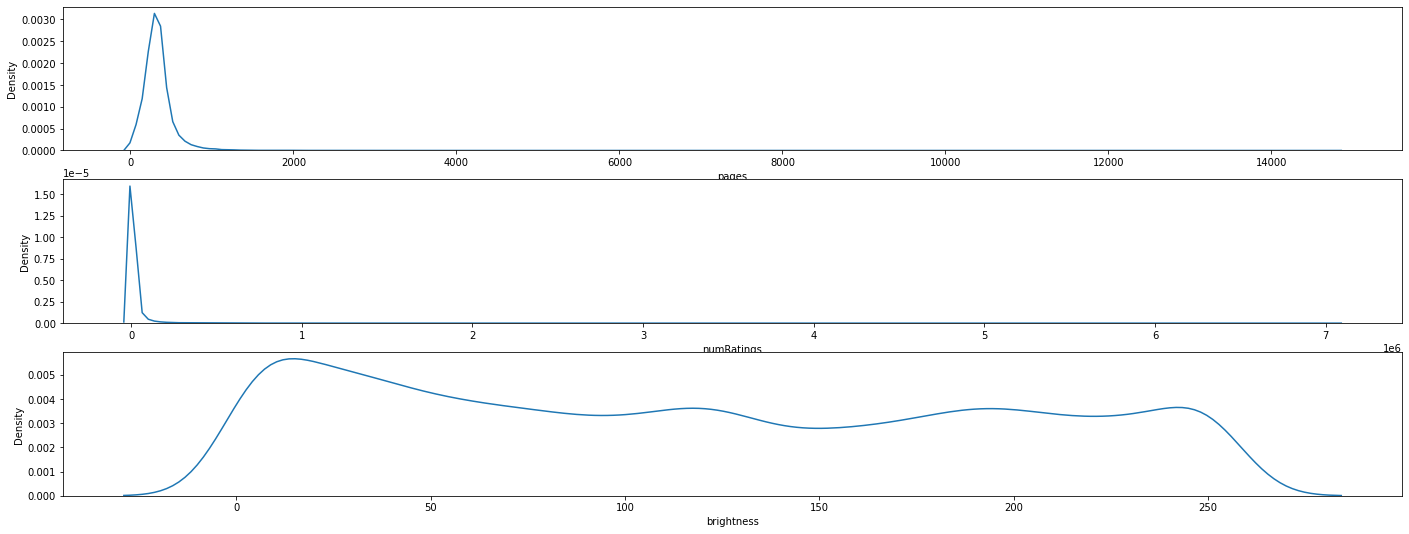

In [ ]:
f, rowcol = plt.subplots(3, 1, figsize=(24, 9))
sb.kdeplot(data = pag.pages, ax = rowcol[0])
sb.kdeplot(data = numR.numRatings, ax = rowcol[1])
sb.kdeplot(data = bri.brightness, ax = rowcol[2])

Removing all the outliers:


In [ ]:
rule = ((df_sub<(Q1-1.5*(Q3-Q1))) | (df_sub>(Q3+1.5*(Q3-Q1))))

outliers = rule.any(axis=1)
outliersindex=outliers.index[outliers==True]
df = df.drop(outliersindex)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30304 entries, 148 to 52477
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bookId                30304 non-null  object 
 1   title                 30304 non-null  object 
 2   rating                30304 non-null  float64
 3   description           30304 non-null  object 
 4   genres                30304 non-null  object 
 5   pages                 29545 non-null  float64
 6   numRatings            30304 non-null  int64  
 7   coverImg              30304 non-null  object 
 8   fiction               30304 non-null  int64  
 9   fantasy               30304 non-null  int64  
 10  romance               30304 non-null  int64  
 11  young adult           30304 non-null  int64  
 12  contemporary          30304 non-null  int64  
 13  adult                 30304 non-null  int64  
 14  nonfiction            30304 non-null  int64  
 15  history          

# **Download our Cleaned Dataset to use for EDA and Modeling**

In [ ]:
from google.colab import files
df.to_csv('dfCleaned2.csv') 
files.download('dfCleaned2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **End of Pre-Processing Notebook!** 

# **Please proceed to EDA notebook :-)**